In [1]:
from matplotlib import pyplot as plt
import requests
import numpy as np
# print(plt.style.available)
plt.style.use("fivethirtyeight")


In [2]:
blue_hex="#399afa"
green_hex="#115c1d"
red_hex="#61131f"
gray_hex="#292828"
yellow_hex="#ebc52d"
orange_hex="#bf4006"
lime_hex="#c9eb34"
colors = [gray_hex,orange_hex,blue_hex,red_hex,green_hex,yellow_hex,lime_hex]

In [3]:
def get_country_timeline(country_code,dimension='new_daily_cases'):
    url = "https://thevirustracker.com/free-api?countryTimeline={}".format(
        country_code)
    response = requests.get(url).json()
    country = response["countrytimelinedata"][0]["info"]["title"]
    data = response["timelineitems"][0]
    del data['stat']
    dev_x = list(data.keys())
    dev_y = [x[dimension] for x in list(data.values())]
    return (dev_x, dev_y, country)


In [4]:

def plot_daily_cases(*countries):
    for color_index, country in enumerate(countries):
        data = get_country_timeline(country)
        plt.plot(range(len(data[1])), data[1], label=data[2], color=colors[color_index])
    plt.legend()
    plt.grid()
    plt.title("Daily Coronavirus count")
    plt.xlabel("Days since first case")
    plt.ylabel("Case count per day")
    plt.show()
    return True

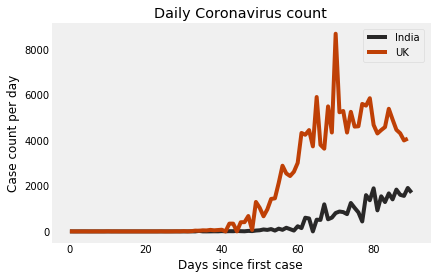

True

In [5]:
plot_daily_cases("IN", "GB")

In [6]:

def plot_daily_cases_bar(country_code, **kwargs):
    data = get_country_timeline(country_code)
    first_n_days = kwargs.get('first_n_days', None)
    last_n_days = kwargs.get('last_n_days', None)

    if (first_n_days != None):
        y_axis = data[1][:first_n_days]
        xlabel = "First {} days".format(first_n_days)
    elif (last_n_days != None):
        y_axis = data[1][-last_n_days:]
        xlabel = "Last {} days".format(last_n_days)
    else:
        y_axis = data[1]
        xlabel = "Days since the first case"

    x_axis = range(len(y_axis))
    label = data[2]
    plt.bar(x_axis, y_axis, label=label,color=colors[0])
    plt.legend()
    plt.grid()
    plt.title("Daily Coronavirus count")
    plt.xlabel(xlabel)
    plt.ylabel("Case count per day")
    plt.show()
    return True

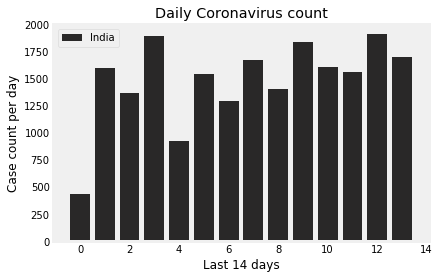

True

In [7]:
plot_daily_cases_bar("IN", last_n_days=14)

In [8]:
def get_death_data(country_code, **kwargs):
    data = get_country_timeline(country_code, "new_daily_deaths")
    first_n_days = kwargs.get('first_n_days', None)
    last_n_days = kwargs.get('last_n_days', None)

    if (first_n_days != None):
        y_axis = data[1][:first_n_days]
        xlabel = "First {} days".format(first_n_days)
    elif (last_n_days != None):
        y_axis = data[1][-last_n_days:]
        xlabel = "Last {} days".format(last_n_days)
    else:
        y_axis = data[1]
        xlabel = "Days since the first case"
    x_axis = range(len(y_axis))
    label = data[2] + " Deaths"
    return (x_axis, y_axis, xlabel, label)

def get_recovery_data(country_code, **kwargs):
    data = get_country_timeline(country_code, "total_recoveries")
    first_n_days = kwargs.get('first_n_days', None)
    last_n_days = kwargs.get('last_n_days', None)

    if (first_n_days != None):
        y_axis = data[1][:first_n_days]
        xlabel = "First {} days".format(first_n_days)
    elif (last_n_days != None):
        y_axis = data[1][-last_n_days:]
        xlabel = "Last {} days".format(last_n_days)
    else:
        y_axis = data[1]
        xlabel = "Days since the first case"
    x_axis = range(len(y_axis))
    label = data[2] + " Recoveries"
    return (x_axis, y_axis, xlabel, label)
    
def plot_death_and_recoveries(country_code, **kwargs):
    first_n_days = kwargs.get('first_n_days', None)
    last_n_days = kwargs.get('last_n_days', None)
    x_axis, y_axis, xlabel, label = get_death_data(country_code, first_n_days=first_n_days, last_n_days=last_n_days)
    plt.bar(x_axis, y_axis, label=label, color=colors[0])
    x_axis, y_axis, xlabel, label = get_recovery_data(country_code, first_n_days=first_n_days, last_n_days=last_n_days)
    plt.plot(x_axis, y_axis, label=label, color=colors[1])
    plt.legend()
    plt.grid()
    plt.title("Daily Coronavirus count")
    plt.xlabel(xlabel)
    plt.ylabel("No of patients")
    plt.show()
    return True

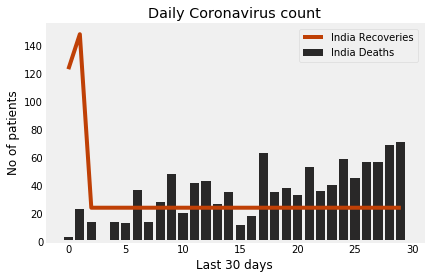

True

In [9]:
plot_death_and_recoveries("IN", last_n_days=30)

In [10]:
def avg_of_last_n_days(arr, n):
    final=[]
    for i in range(len(arr)):
        if (i-n)>-1:
            final.append(np.mean(arr[i-n:i]))
    return [0]*n+final

def plot_daily_cases_versus_nday_avg(country_code, **kwargs):
    data = get_country_timeline(country_code)
    first_n_days = kwargs.get('first_n_days', None)
    last_n_days = kwargs.get('last_n_days', None)
    ndays = kwargs.get('ndays', 7)
    if (first_n_days != None):
        y_axis = data[1][:first_n_days]
        xlabel = "First {} days".format(first_n_days)
    elif (last_n_days != None):
        y_axis = data[1][-last_n_days:]
        xlabel = "Last {} days".format(last_n_days)
    else:
        y_axis = data[1]
        xlabel = "Days since the first case"

    x_axis = range(len(y_axis))
    label = data[2]+" daily count"
    plt.bar(x_axis, y_axis, label=label,color=colors[0])
    y_axis = avg_of_last_n_days(y_axis, ndays)
    plt.plot(range(len(y_axis)), y_axis, label=label+" last {} day mean".format(ndays),color=colors[1])
    
    plt.legend()
    plt.grid()
    plt.title("Daily Coronavirus count")
    plt.xlabel(xlabel)
    plt.ylabel("Case count per day")
    plt.show()
    return True

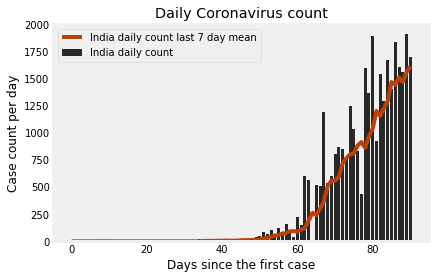

True

In [11]:
plot_daily_cases_versus_nday_avg("IN", ndays=7)

In [12]:

def plot_last10_cases(*countries,**kwargs):
    width = 0.25
    for color_index, country in enumerate(countries):
        data = get_country_timeline(country)
        first_n_days = kwargs.get('first_n_days', 0)
        last_n_days = kwargs.get('last_n_days', 0)
        if ((last_n_days == 0) and (first_n_days > 0)):
            y_axis = data[1][:first_n_days]
            xlabel = "No of cases in First {} days".format(first_n_days)
        elif ((last_n_days > 0) and (first_n_days == 0)):
            y_axis = data[1][-last_n_days:]
            xlabel = "No of cases in Last {} days".format(last_n_days)
        elif ((last_n_days > 0) and (first_n_days > 0)):
            y_axis = data[1][first_n_days:last_n_days]
            xlabel = "No of cases between day {}  and {} ".format(first_n_days,last_n_days)
        else:
            y_axis = data[1]
            xlabel = "Days since the first case"
        plt.bar(np.arange(len(y_axis))+(width*color_index), y_axis, label=data[2], color=colors[color_index], width=width)
    plt.legend()
    plt.grid()
    plt.title(xlabel)
    plt.xlabel("Days")
    plt.ylabel("Cases")
    plt.show()
    return True

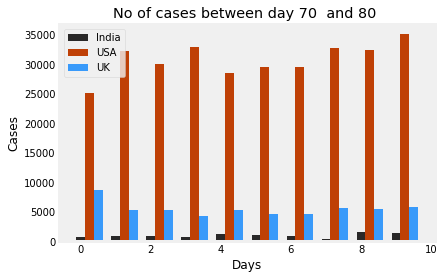

True

In [13]:
plot_last10_cases("IN","US","GB", first_n_days=70, last_n_days=80)

In [14]:

def plot_daily_cases_barh(country_code, **kwargs):
    data = get_country_timeline(country_code)
    first_n_days = kwargs.get('first_n_days', None)
    last_n_days = kwargs.get('last_n_days', None)

    if (first_n_days != None):
        x_axis = data[0][:first_n_days]
        y_axis = data[1][:first_n_days]
        xlabel = "First {} days".format(first_n_days)
    elif (last_n_days != None):
        x_axis = data[0][-last_n_days:]
        y_axis = data[1][-last_n_days:]
        xlabel = "Last {} days".format(last_n_days)
    else:
        x_axis = data[0]
        y_axis = data[1]
        xlabel = "Days since the first case"
    label = data[2]
    plt.barh(x_axis, y_axis, label=label,color=colors[2])
    plt.legend()
    plt.grid()
    plt.title("Daily Coronavirus count")
    plt.xlabel(xlabel)
    plt.ylabel("Case count per day")
    plt.show()
    plt.tight_layout
    return True

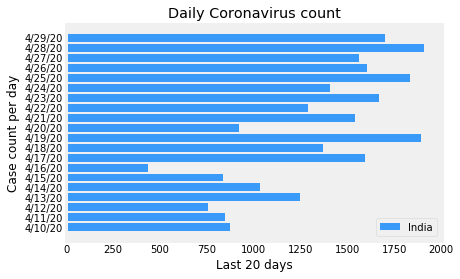

True

In [15]:
plot_daily_cases_barh("IN", last_n_days=20)

In [16]:
def plot_pie_chart(country_code):
    data = get_country_timeline(country_code)
    measure = data[1][-7:]
    dimension = data[0][-7:]
    todays_slice=[0]*len(dimension)
    todays_slice[6]=0.1
    plt.pie(measure, labels=dimension, wedgeprops={"edgecolor":"black"},
            colors=colors,explode=todays_slice,shadow=True,startangle=90,
            autopct="%1.1f%%")
    plt.title("Last Seven Days ({})".format(data[2]))
    plt.tight_layout
    plt.show()

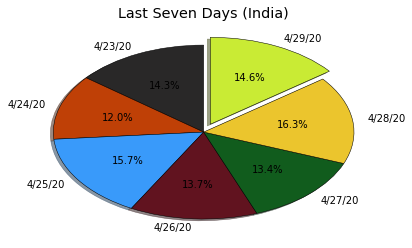

In [17]:
plot_pie_chart("IN")

In [18]:

def plot_stack_chart(*countries):
    measures=[]
    dimensions=[]
    color_list=[]
    for color_index, country_code in enumerate(countries):
        data = get_country_timeline(country_code)
        if data[2] not in dimensions:
            dimensions.append(data[2])
            color_list.append(colors[color_index])
        measures.append(data[1][-7:])
    plt.stackplot([0,1,2,3,4,5,6], *measures, labels=dimensions,colors=color_list)
    plt.legend(loc="upper left")
    return True

True

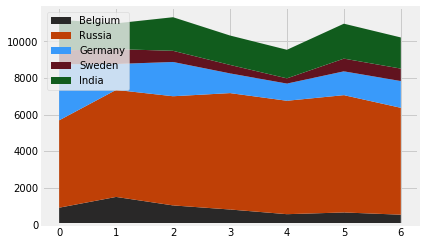

In [19]:
plot_stack_chart("BE","RU","DE","SE","IN")

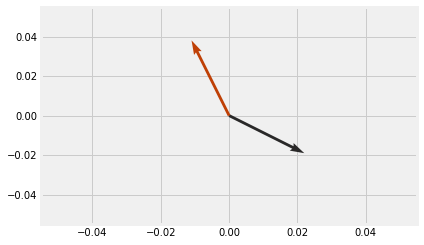

In [20]:
V=np.array([[2,-1],[-1,2]])
origin = [0], [0] # origin point
plt.quiver(*origin, V[:,0], V[:,1], color=colors[:3],scale=10)
plt.show()


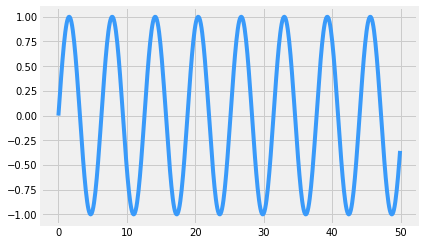

In [21]:
import math
x = np.arange(0, 50, 0.1)
y = np.sin(x)
plt.plot(x , y, color=colors[2])

In [100]:
def growth(population):
    growth_rate = []
    for pop in range(1, len(population)):
        gnumbers = ((population[pop] - population[pop-1]) * 100.0 / population[pop-1])
        growth_rate.append(gnumbers)
    return growth_rate

def plot_doubling_rate(country_code):
    data  = get_country_timeline(country_code,'total_cases')
    country = data[2]
    data = data[1]
    plot_values = [data.index(case_count)-min(range(len(data)), key=lambda x: abs((data[x])-(case_count/2))) for idx,case_count in enumerate(data)]
    current_halved_value = min(enumerate(data), key=lambda x: abs(x[1]-data[-1]/2))
    y_axis=growth(data)[:current_halved_value[0]]
    y_axis=[x for x in plot_values]
    x_axis=range(len(y_axis))   
    print(y_axis)
    plt.plot(x_axis, y_axis, label=country, color=colors[1])
    plt.legend()
    plt.grid()
    plt.title("Doubling rate of coronavirus in {}".format(country))
    plt.xlabel("Days since first case")
    plt.ylabel("Doubling rate in days")
    plt.show()


[0, 0, 0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 29, 29, 2, 3, 4, 3, 4, 5, 6, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 3, 3, 3, 4, 4, 4, 5, 5, 6, 5, 5, 4, 3, 3, 4, 4, 4, 5, 4, 4, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 11]


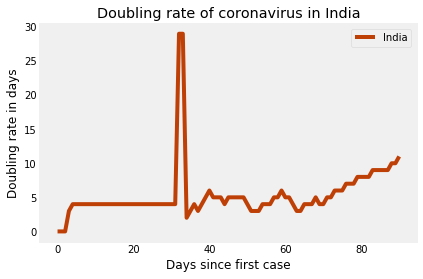

In [101]:
plot_doubling_rate('IN')

1